# Entrega 4
## Por: Juan Felipe Calderón Cárdenas

# **Preparativos**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

conn = sqlite3.connect('/content/drive/MyDrive/Colab_Notebooks/music_smaller_10000.db')


In [22]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables


,name
0,slice_time
1,playlists
2,song


In [27]:
tables


,name
0,slice_time
1,playlists
2,song


In [29]:
df=pd.read_sql_query("SELECT * FROM playlists", conn)
df

,slice,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
0,0-999,0,1493424000,52,47,1,6,11532414,37
1,0-999,1,1506556800,39,23,1,5,11656470,21
2,0-999,2,1505692800,64,51,1,18,14039958,31
3,0-999,3,1501027200,126,107,1,4,28926058,86
4,0-999,4,1401667200,17,16,2,7,4335282,16
...,...,...,...,...,...,...,...,...,...
7995,10000-10999,10995,1508544000,57,6,1,3,12384066,3
7996,10000-10999,10996,1485475200,130,121,1,43,29204524,109
7997,10000-10999,10997,1477526400,63,27,1,10,14965824,22
7998,10000-10999,10998,1442534400,38,20,1,3,8052086,14


In [30]:
print(df.describe())


                pid   modified_at   num_tracks   num_albums  num_followers  \
count   8000.000000  8.000000e+03  8000.000000  8000.000000    8000.000000   
mean    6124.500000  1.476979e+09    66.138500    49.545875       3.970625   
std     3364.390456  3.623983e+07    53.547439    39.965655     180.030385   
min        0.000000  1.310602e+09     5.000000     2.000000       1.000000   
25%     2999.750000  1.460398e+09    26.000000    20.000000       1.000000   
50%     6999.500000  1.490789e+09    49.000000    37.000000       1.000000   
75%     8999.250000  1.505801e+09    91.000000    68.000000       1.000000   
max    10999.000000  1.509494e+09   250.000000   233.000000   15842.000000   

         num_edits   duration_ms  num_artists  
count  8000.000000  8.000000e+03  8000.000000  
mean     17.954625  1.549995e+07    38.149875  
std      20.902767  1.276301e+07    30.321656  
min       2.000000  7.197680e+05     3.000000  
25%       4.000000  6.007984e+06    16.000000  
50%      

In [31]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


## **PREGUNTAS PROPUESTAS**

# **¿Cuál es el top 10 de playlists con el número maximo de seguidores?**

In [36]:
%%sql
SELECT pid, MAX (num_followers) AS max_followers
FROM playlists
GROUP BY pid
ORDER BY MAX (num_followers) DESC
LIMIT 10

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/music_smaller_10000.db
Done.


pid,max_followers
7215,15842
2957,2699
765,1038
9307,58
3305,53
3089,52
3980,52
2416,44
7206,44
2282,43


In [38]:
%%sql
query=
""SELECT pid, MAX (num_followers) AS max_followers
FROM playlists
GROUP BY pid
ORDER BY MAX (num_followers) DESC
LIMIT 10""

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/music_smaller_10000.db
(sqlite3.OperationalError) near "query": syntax error
[SQL: query=
""SELECT pid, MAX (num_followers) AS max_followers
FROM playlists
GROUP BY pid
ORDER BY MAX (num_followers) DESC
LIMIT 10""]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [39]:
query = """
SELECT pid, MAX(num_followers) AS max_followers
FROM playlists
GROUP BY pid
ORDER BY MAX(num_followers) DESC
LIMIT 10
"""
df_grouped = pd.read_sql_query(query, conn)

<ipython-input-41-85b837cba868>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pid', y='max_followers', data=df_grouped, palette='viridis')


Text(0, 0.5, 'Número Máximo de Seguidores')

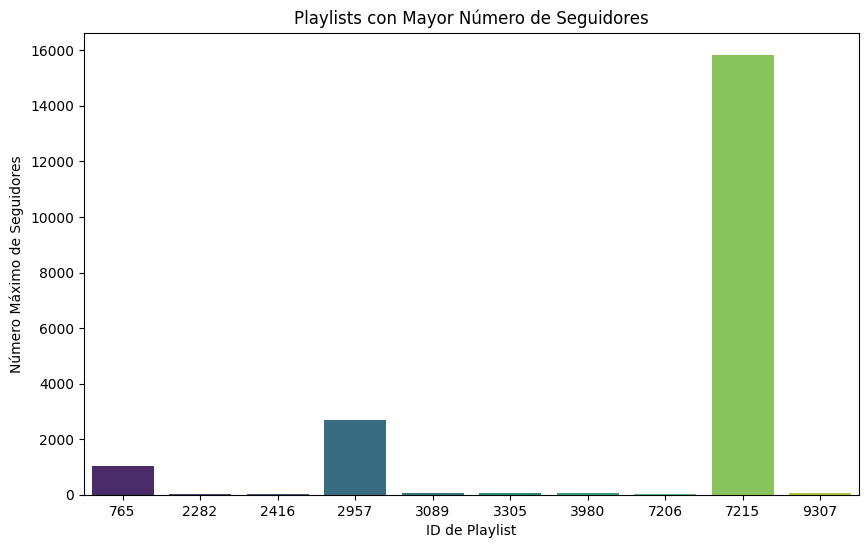

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pid', y='max_followers', data=df_grouped, palette='viridis')
plt.title('Playlists con Mayor Número de Seguidores')
plt.xlabel('ID de Playlist')
plt.ylabel('Número Máximo de Seguidores')

La gran cantidad de usuarios en ciertas playlists, como la del ID 7214, podria estar relacionada a una selección musical mas actual, mayor visibilidad en la plataforma, que este constituida de canciones mas populares, o que sea muy promocionada en la plataforma. Si bien hay oferta de playlists, muy pocas dominan en terminos de popularidad, o los usuarios prefieren escuchar playlists mas "mainstream".

# **¿Cuál es el número promedio de artistas por playlist?**

In [94]:
query2 = """
SELECT pid, AVG(num_artists) AS num_artists
FROM playlists
GROUP BY pid
ORDER BY AVG(num_followers) DESC
LIMIT 10
"""
df_grouped = pd.read_sql_query(query2, conn)

<ipython-input-95-a7904123eaf9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_artists', y='pid', data=df_grouped, palette='viridis', orient='h')


Text(0, 0.5, 'ID de Playlist')

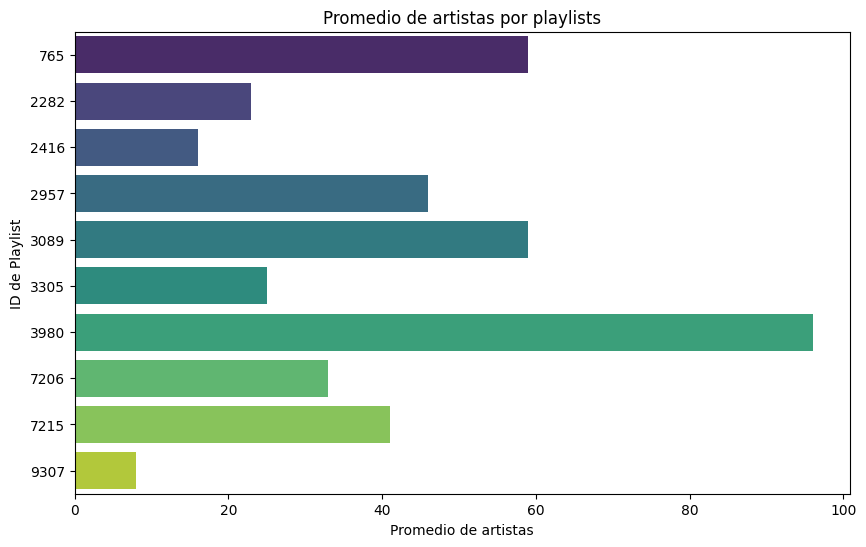

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x='num_artists', y='pid', data=df_grouped, palette='viridis', orient='h')
plt.title('Promedio de artistas por playlists')
plt.xlabel('Promedio de artistas')
plt.ylabel('ID de Playlist')


Esta grafica nos sugiere diferentes enfoques de contenido. Algunas playlists tienen una gran cantidad de artistas, lo que las podria volver mucho mas variadas en generos y gustos. Mientras que las que poseen un conjunto mas pequeño, pueden estar enfocadas a un genero o artista especifico. De igual manera se nota que existen muchas mas playlists con mas de 20 artistas en promedio, lo que sugiere que la mayoria los usuarios prefieren tener una gran variedad generos o estilos de musica.

# **Top 5 de playlists con la mayor suma de albumes**

In [182]:
query3 = """
SELECT pid , SUM(num_albums) AS num_albums
FROM playlists
GROUP BY pid
ORDER BY SUM(num_albums) DESC
LIMIT 5
"""
df_grouped = pd.read_sql_query(query3, conn)

In [184]:
df_grouped

,pid,num_albums
0,3149,233
1,123,225
2,7115,219
3,7911,219
4,8548,216


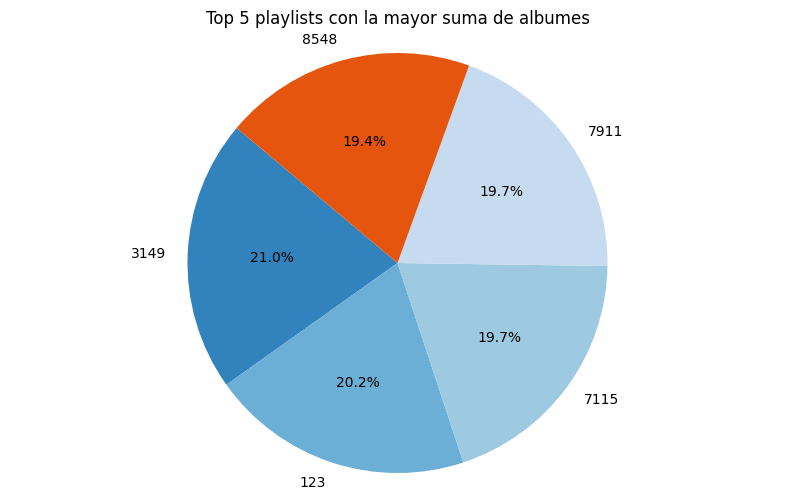

In [183]:
colors = plt.cm.tab20c.colors
plt.figure(figsize=(10, 6))
plt.pie(df_grouped['num_albums'], labels=df_grouped['pid'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 playlists con la mayor suma de albumes')
plt.axis('equal')
plt.show()

Las cinco playlists con mayor numero de albumes tienen similares proporciones, todas poseen una contribucion equilibrada en el numero de albumes. Esto indica que realmente no hay una seleccion cuidadosa de los usuarios por los albumes, sino por las canciones, lo que explicaria porque la distribucion es tan equiparada.

In [51]:
%%sql
SELECT pid , SUM(num_albums) AS num_albums
FROM playlists
GROUP BY pid
ORDER BY SUM(num_albums) DESC
LIMIT 5

 * sqlite:////content/drive/MyDrive/Colab_Notebooks/music_smaller_10000.db
Done.


pid,num_albums
3149,233
123,225
7115,219
7911,219
8548,216


la grafica muestra la suma de albumes maximo para las cinco playlists que tienen el mayor numero de albumes.

# **Numero de ediciones por codigo de playlist**

In [157]:
query4 = """
SELECT pid , SUM(num_edits) AS num_edits
FROM playlists
GROUP BY pid
ORDER BY pid DESC
LIMIT 10
"""
df_grouped = pd.read_sql_query(query4, conn)

In [158]:
df_grouped

,pid,num_edits
0,10999,14
1,10998,3
2,10997,10
3,10996,43
4,10995,3
5,10994,2
6,10993,44
7,10992,17
8,10991,5
9,10990,11


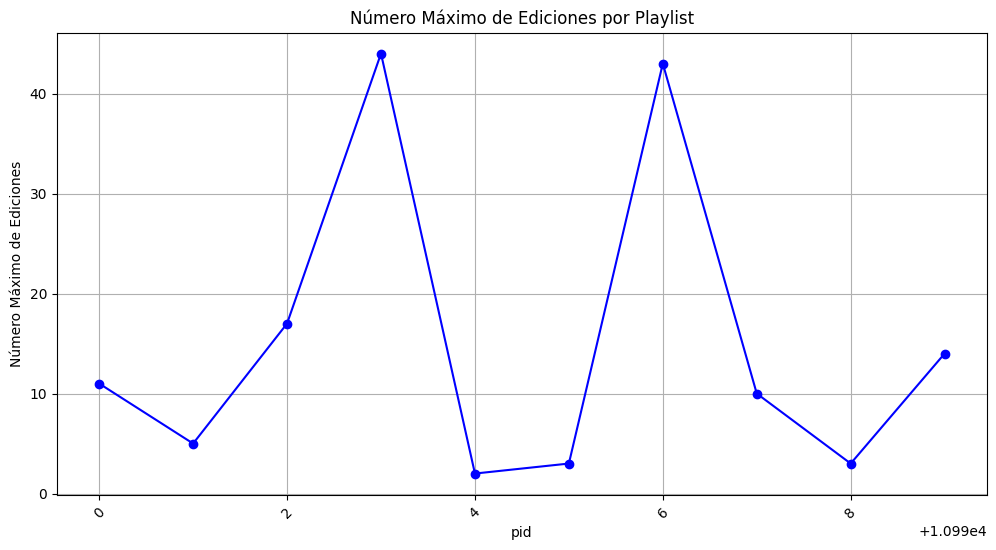

In [160]:
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['pid'], df_grouped['num_edits'], marker='o', linestyle='-', color='b')
# Añadir títulos y etiquetas
plt.title('Número Máximo de Ediciones por Playlist')
plt.xlabel('ID de la playlist')
plt.ylabel('Número Máximo de Ediciones')

# Ajustar rotación de las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.grid(True)  # Añadir una cuadrícula para mejor visualización
plt.show()

Se observa que para las playlists de la 10990	a 10999 las ediciones son variadas, no se encuentra relacion entre el numero de la playlist y el numero de las ediciones. De hecho para playlists de numeros altos como es la 10998 y 10994 las ediciones son minimas.

# **¿Cual es la relacion del numero de artistas y el numero de seguidores de una playlist?**

In [170]:
query5 = """
SELECT
    CASE
        WHEN num_artists BETWEEN 0 AND 5 THEN '0-5 artists'
        WHEN num_artists BETWEEN 6 AND 10 THEN '6-10 artists'
        WHEN num_artists BETWEEN 11 AND 15 THEN '11-15 artists'
        WHEN num_artists BETWEEN 16 AND 20 THEN '16-20 artists'
        ELSE '21+ artists'
    END AS artist_range,
    SUM(num_tracks) AS total_tracks,
    AVG(num_followers) AS avg_followers,
    COUNT(*) AS num_playlists

FROM
    playlists
GROUP BY
    artist_range
ORDER BY
    avg_followers DESC
LIMIT 10;
"""
df_grouped = pd.read_sql_query(query5, conn)

In [171]:
df_grouped


,artist_range,total_tracks,avg_followers,num_playlists
0,21+ artists,452733,5.341454,5254
1,16-20 artists,28115,1.391972,847
2,6-10 artists,16670,1.373611,720
3,0-5 artists,10458,1.345345,333
4,11-15 artists,21132,1.282506,846


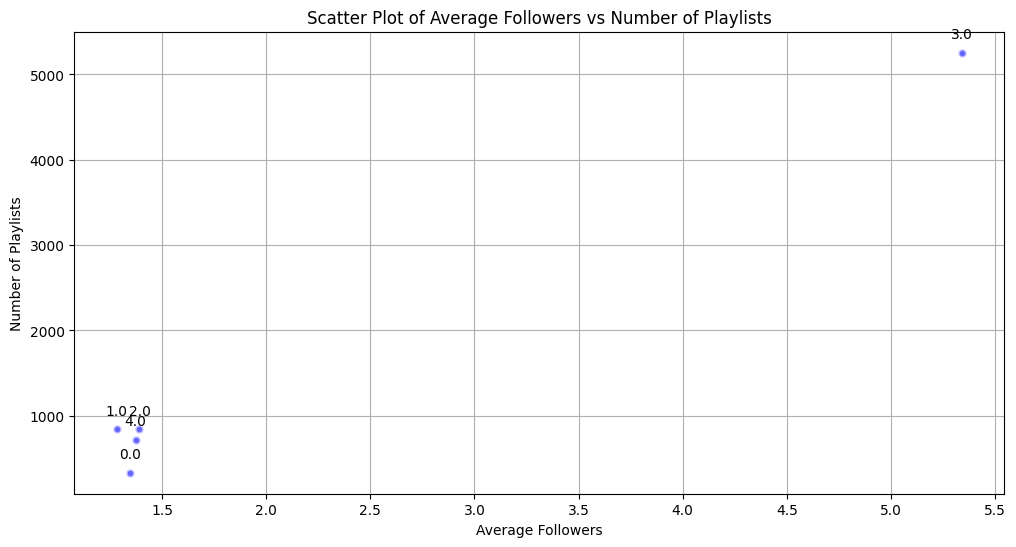

In [180]:
plt.figure(figsize=(12, 6))
plt.scatter(df_grouped['avg_followers'], df_grouped['num_playlists'], color='b', alpha=0.6, edgecolors="w", linewidth=2)

# Añadir títulos y etiquetas
plt.title('Scatter Plot of Average Followers vs Number of Playlists')
plt.xlabel('Average Followers')
plt.ylabel('Number of Playlists')

# Añadir etiquetas a los puntos
for i, row in df_grouped.iterrows():
    plt.annotate(row['artist_range'], (row['avg_followers'], row['num_playlists']), textcoords="offset points", xytext=(0,10), ha='center')

# Mostrar la gráfica
plt.grid(True)
plt.show()

Esta grafica evidencia que cuando agrupamos las listas por numero de artistas que tienen encontramos que las listas que tienen mas de 21 artistas superan significativamente los seguidores de los que tienen menos de 20 artistas. Lo que indica que a mayor numero de artistas en una playlist mayor numero de seguidores. Lo que puede influenciar significativamente en el exito de una playlist.